 # Data Analysis - Going Deeper In Employee Data Analysis

In this part of the analysis, I'll perform the second data analysis process to investigate a dataset on *construction site employees* and explore new ways of manipulating data with NumPy and Pandas, as well as powerful visualization tools with Matplotlib and Seaborn.
    
We're going to investigate the dataset resultant of our first project "[Cleaning and First Questions Answered](link_to_Article)" on construction site employee salaries. Let's take a closer look at its attributes and pose some questions for our analysis.
    
## Questions
    
* 
* 
* 
* 
* 


# 1. Import and Load

In [1]:
# I'll use this section to import every library that I'll need to the analysis.

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import os
import locale

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib import dates as mdates

import scipy.stats as stats


In [2]:

# In Brazil common CSV files come with ";" as a delimiter, so use the sep=";" to read a CSV that has no commas. 
# This is due to decimal numbers in Brazil being separated by commas not dots. Example: USA = 1092.12 Brazil = 1092,12.

df_emp = pd.read_csv('df_employee.csv', sep=";")
df_emp.head()


,id,month_year,employee_id,employee_name,gender,age,salary,function_group,company_name,company_city,company_state,company_type,const_site_category,pay_month
0,180152022-01-01,01/01/2022,18015,Brendan Foster,Male,21,1212,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01
1,229832022-01-01,01/01/2022,22983,Jeremiah Sanders,Male,25,1212,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01
2,180852022-01-01,01/01/2022,18085,Xavier Ross,Male,24,1212,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01
3,179422022-01-01,01/01/2022,17942,Jorge Russell,Male,34,"1739,3",Professionals,The Summit at Laurel Canyon,Palmas,Tocantins,Construction Site,Commercial,2022-01
4,224222022-01-01,01/01/2022,22422,Edward Ortiz,Male,18,1212,Assistants,The Summit at Laurel Canyon,Palmas,Tocantins,Construction Site,Commercial,2022-01


# 2. Data Exploration and Transformation

In [3]:
# Size of the dataset .
print(df_emp.shape)

(6807, 14)


There are 6,807 rows and 14 columns

In [4]:
# Types of the data entries.
print(df_emp.dtypes)

id                     object
month_year             object
employee_id             int64
employee_name          object
gender                 object
age                     int64
salary                 object
function_group         object
company_name           object
company_city           object
company_state          object
company_type           object
const_site_category    object
pay_month              object
dtype: object


Most of the data types are *objects*, that basically means text content.

Actions:
* Change the data type of 'salary' column to *float* (decimal numbers).
* Change the data type of date columns to *date*.

In [5]:
# First I have to change the numbers from Brazil format to US format in order to run into python code. Then transform the data type.
df_emp['salary'] = df_emp['salary'].astype(str).str.replace(',', '.').astype(float)

In [6]:

df_emp['pay_month'] = pd.to_datetime(df_emp['pay_month'])
df_emp['month_year'] = pd.to_datetime(df_emp['month_year'])

In [7]:
# Checking the new data types and table.
print(df_emp.dtypes)
df_emp.head()

id                             object
month_year             datetime64[ns]
employee_id                     int64
employee_name                  object
gender                         object
age                             int64
salary                        float64
function_group                 object
company_name                   object
company_city                   object
company_state                  object
company_type                   object
const_site_category            object
pay_month              datetime64[ns]
dtype: object


,id,month_year,employee_id,employee_name,gender,age,salary,function_group,company_name,company_city,company_state,company_type,const_site_category,pay_month
0,180152022-01-01,2022-01-01,18015,Brendan Foster,Male,21,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01
1,229832022-01-01,2022-01-01,22983,Jeremiah Sanders,Male,25,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01
2,180852022-01-01,2022-01-01,18085,Xavier Ross,Male,24,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01
3,179422022-01-01,2022-01-01,17942,Jorge Russell,Male,34,1739.3,Professionals,The Summit at Laurel Canyon,Palmas,Tocantins,Construction Site,Commercial,2022-01-01
4,224222022-01-01,2022-01-01,22422,Edward Ortiz,Male,18,1212.0,Assistants,The Summit at Laurel Canyon,Palmas,Tocantins,Construction Site,Commercial,2022-01-01


Now we're good to go. The data is transformed to be used in any further analysis.

# Exploratory Data Analysis (EDA) and Visualizations

In [8]:
# We start with simple statistical inferences.
# The 'describe' function gives us the basic statistics of the numeric columns, let's round it by two decimals.

print(round(df_emp.describe(),2))

       employee_id      age   salary
count      6807.00  6807.00  6807.00
mean      28736.11    26.90  1601.73
std        3511.24     5.44   568.97
min        9134.00    18.00   950.00
25%       27747.00    23.00  1212.00
50%       29738.00    26.00  1375.00
75%       31070.00    31.00  1870.00
max       33222.00    38.00  5500.00


In [9]:
# Create a year column

df_emp['year'] = df_emp['pay_month'].dt.year
df_emp.head()

,id,month_year,employee_id,employee_name,gender,age,salary,function_group,company_name,company_city,company_state,company_type,const_site_category,pay_month,year
0,180152022-01-01,2022-01-01,18015,Brendan Foster,Male,21,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01,2022
1,229832022-01-01,2022-01-01,22983,Jeremiah Sanders,Male,25,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01,2022
2,180852022-01-01,2022-01-01,18085,Xavier Ross,Male,24,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01,2022
3,179422022-01-01,2022-01-01,17942,Jorge Russell,Male,34,1739.3,Professionals,The Summit at Laurel Canyon,Palmas,Tocantins,Construction Site,Commercial,2022-01-01,2022
4,224222022-01-01,2022-01-01,22422,Edward Ortiz,Male,18,1212.0,Assistants,The Summit at Laurel Canyon,Palmas,Tocantins,Construction Site,Commercial,2022-01-01,2022


In [10]:
# This code block is created to define some dataframes to use in the visualizations

# Create Timely dataframes

df_emp_2022 = df_emp[df_emp['pay_month'].dt.year == 2022]
df_emp_2023 = df_emp[df_emp['pay_month'].dt.year == 2023]

# Current month
latest_month = df_emp["month_year"].max()
df_emp_today = df_emp[df_emp["month_year"] == latest_month]

# Averages
avg_salary = df_emp["salary"].mean()
avg_salary_2022 = df_emp_2022["salary"].mean()
avg_salary_2023 = df_emp_2023["salary"].mean()
last_month_avg_salary = df_emp_today['salary'].mean()

# Average salary by function group
average_salary_by_function_group = round(df_emp.groupby('function_group')['salary'].mean(),2)

# Average salary by function group in 2022
average_salary_by_function_group_2022 = round(df_emp_2022.groupby('function_group')['salary'].mean(),2)

# Average salary by function group in 2023
average_salary_by_function_group_2023 = round(df_emp_2023.groupby('function_group')['salary'].mean(),2)

## Average by function group

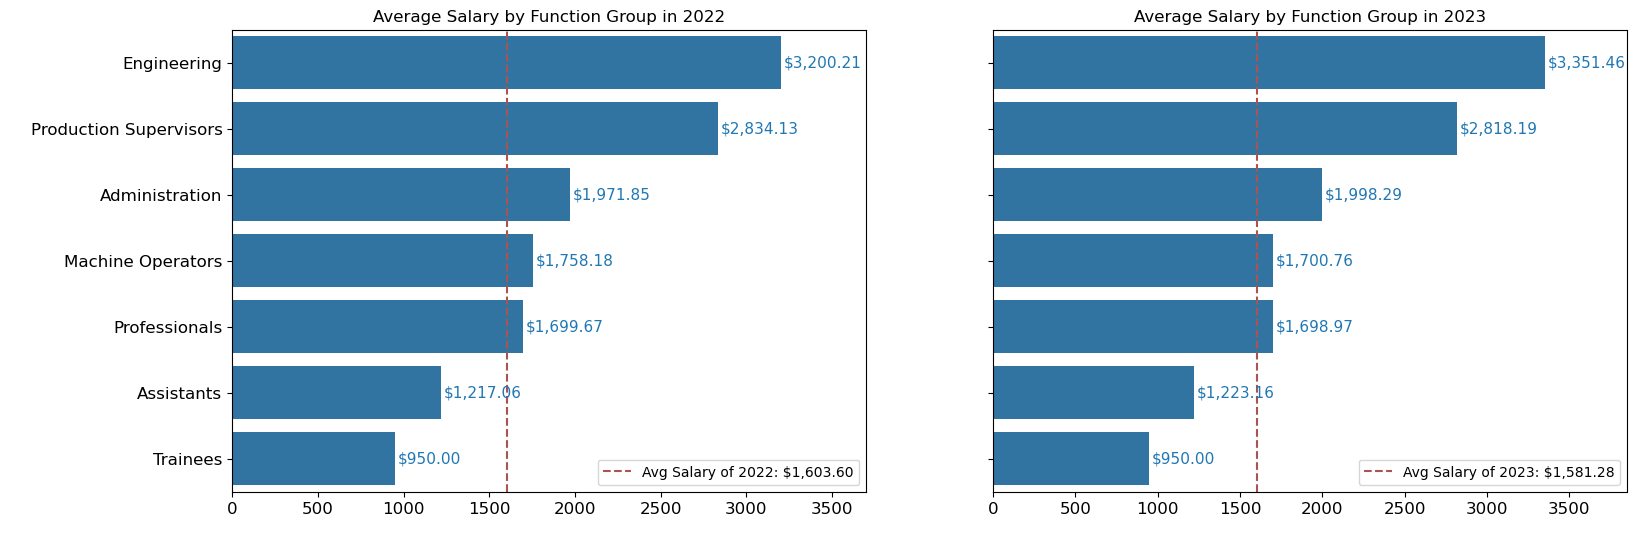

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)
light_red = sns.desaturate('tab:red',0.5)

# Average Salary by Function Group in 2022
sns.barplot(ax=axes[0], x=average_salary_by_function_group_2022.sort_values(ascending=False), y=average_salary_by_function_group_2022.sort_values(ascending=False).index, color='tab:blue')
axes[0].set_xlabel(' ', fontsize=12)
axes[0].set_ylabel(' ', fontsize=12)
axes[0].set_xlim(0, max(average_salary_by_function_group_2022.values) + 500)
axes[0].set_title('Average Salary by Function Group in 2022', fontsize=12)
axes[0].tick_params(axis='both', labelsize=12)

# add average salary as a vertical line
axes[0].axvline(x=avg_salary, color=light_red, linestyle='--', label='Avg Salary of 2022: ${:,.2f}'.format(df_emp_2022['salary'].mean()))

# add labels to the bar
for i, v in enumerate(average_salary_by_function_group_2022.sort_values(ascending=False)):
        axes[0].annotate(str("${:,.2f}".format(v)), xy=(v, i), xytext=(2, 0), textcoords='offset points', color='tab:blue', fontsize=11, va='center')

axes[0].legend(loc='lower right', fontsize=10)

# Average Salary by Function Group in 2023
sns.barplot(ax=axes[1], x=average_salary_by_function_group_2023.sort_values(ascending=False), y=average_salary_by_function_group_2023.sort_values(ascending=False).index, color='tab:blue')
axes[1].set_xlabel(' ', fontsize=12)
axes[1].set_ylabel(' ', fontsize=12)
axes[1].set_xlim(0, max(average_salary_by_function_group_2023.values) + 500)
axes[1].set_title('Average Salary by Function Group in 2023', fontsize=12)
axes[1].tick_params(axis='both', labelsize=12)

# add average salary as a vertical line
axes[1].axvline(x=avg_salary, color=light_red, linestyle='--', label='Avg Salary of 2023: ${:,.2f}'.format(df_emp_2023['salary'].mean()))

# add labels to the bar
for i, v in enumerate(average_salary_by_function_group_2023.sort_values(ascending=False)):
       axes[1].annotate(str("${:,.2f}".format(v)), xy=(v, i), xytext=(2, 0), textcoords='offset points', color='tab:blue', fontsize=11, va='center')


axes[1].legend(loc='lower right', fontsize=10)

plt.show()

* Are the marjority of function groups above or bellow average? How many of them?
* How was last year and how is it going now?

In [12]:
print(average_salary_by_function_group_2022.rank(ascending=False).sort_values(ascending=True))

function_group
Engineering               1.0
Production Supervisors    2.0
Administration            3.0
Machine Operators         4.0
Professionals             5.0
Assistants                6.0
Trainees                  7.0
Name: salary, dtype: float64


In [13]:

#Number of employees by construction site category and the average

employee_by_category = round(df_emp_today.groupby('const_site_category')['employee_id'].count(),2)
avg_num_of_employees_by_type = employee_by_category.mean()


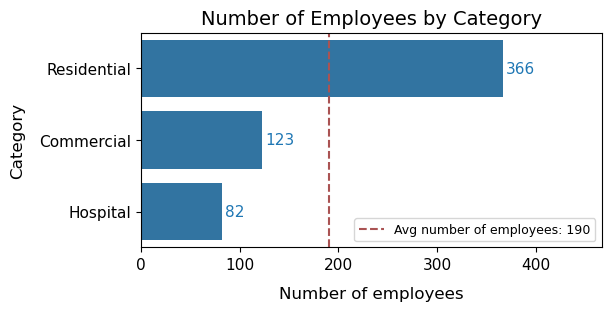

In [14]:
plt.figure(figsize=(6,3), layout='constrained')
light_red = sns.desaturate('tab:red',0.5)

sns.barplot(x=employee_by_category.sort_values(ascending=False), y=employee_by_category.sort_values(ascending=False).index, color='tab:blue')
plt.xlabel('Number of employees', fontsize=12, labelpad=10)
plt.ylabel('Category', fontsize=12, labelpad=10)
plt.xlim(0, max(employee_by_category.values) + 100)
plt.title('Number of Employees by Category', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# add average number of employees as a vertical line
plt.axvline(x=avg_num_of_employees_by_type, color=light_red, linestyle='--', label='Avg number of employees: {:.0f}'.format(avg_num_of_employees_by_type))

# add labels to the bars with padding and adjust position
for i, v in enumerate(employee_by_category.sort_values(ascending=False)):
    plt.annotate(str("{:.0f}".format(v)), xy=(v, i), xytext=(2, 0), textcoords='offset points', color='tab:blue', fontsize=11, va='center')

plt.legend(fontsize=9)
plt.show()

* What is the construction site category that has the most employees?
* What is the relationship with the number of employees by category type? (Create a table to )

In [15]:
df_emp_today.groupby('const_site_category')['company_name'].nunique().reset_index().sort_values('company_name', ascending=False)


,const_site_category,company_name
2,Residential,11
0,Commercial,5
1,Hospital,1


In [62]:
avg_of_category_by_company = df_emp_today.groupby(['company_name', 'const_site_category'])['employee_name'].count().groupby('const_site_category').mean()
avg_of_category_by_company = round(avg_of_category_by_company.reset_index(),2)
avg_of_category_by_company

,const_site_category,employee_name
0,Commercial,24.60
1,Hospital,82.00
2,Residential,33.27


* This means that 1 hospital alone has is responsible for the most people

In [17]:
# Number of employees by company and average

employee_by_company = round(df_emp_today.groupby('company_name')['employee_id'].count(),2)
avg_num_of_employees_by_company = employee_by_company.mean()

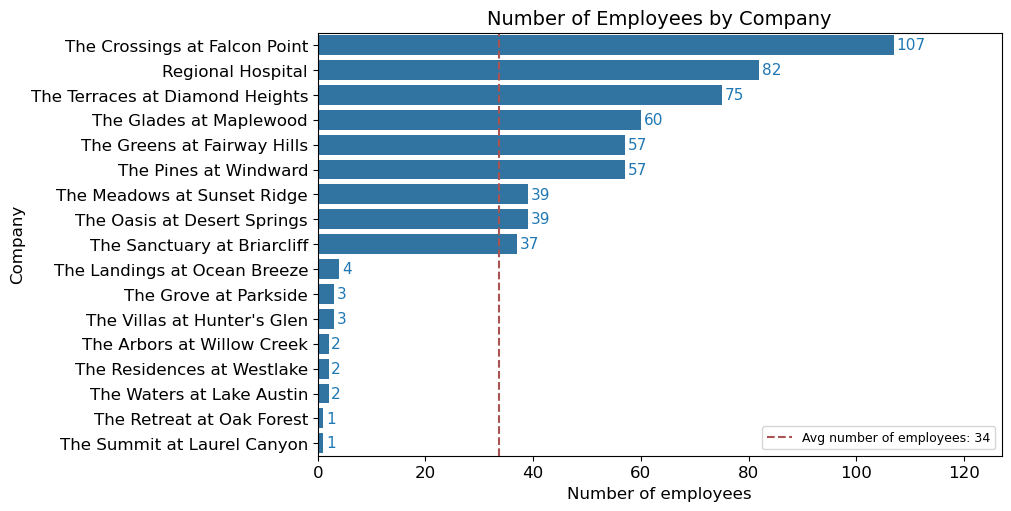

In [18]:
plt.figure(figsize=(10,5), layout='constrained')
light_red = sns.desaturate('tab:red',0.5)

sns.barplot(x=employee_by_company.sort_values(ascending=False), y=employee_by_company.sort_values(ascending=False).index, color='tab:blue')
plt.xlabel('Number of employees', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.xlim(0, max(employee_by_company.values) + 20)
plt.title('Number of Employees by Company', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add average number of employees as a vertical line
plt.axvline(x=avg_num_of_employees_by_company, color=light_red, linestyle='--', label='Avg number of employees: {:,.0f}'.format(avg_num_of_employees_by_company))

# add labels to the bars with padding and adjust position
for i, v in enumerate(employee_by_company.sort_values(ascending=False)):
    plt.annotate(str("{:.0f}".format(v)), xy=(v, i), xytext=(2, 0), textcoords='offset points', color='tab:blue', fontsize=11, va='center')

plt.legend(fontsize=9)
plt.show()

* What are the companies that has the most people

In [19]:
# Create a dataframe when the company has more than 10 employees and the average. 
# The company that has less then 10 employees are in after delivered product.
employee_by_company = df_emp_today.groupby('company_name')['employee_id'].count()
current_companies = employee_by_company[employee_by_company > 10]
avg_cur_company = current_companies.mean()


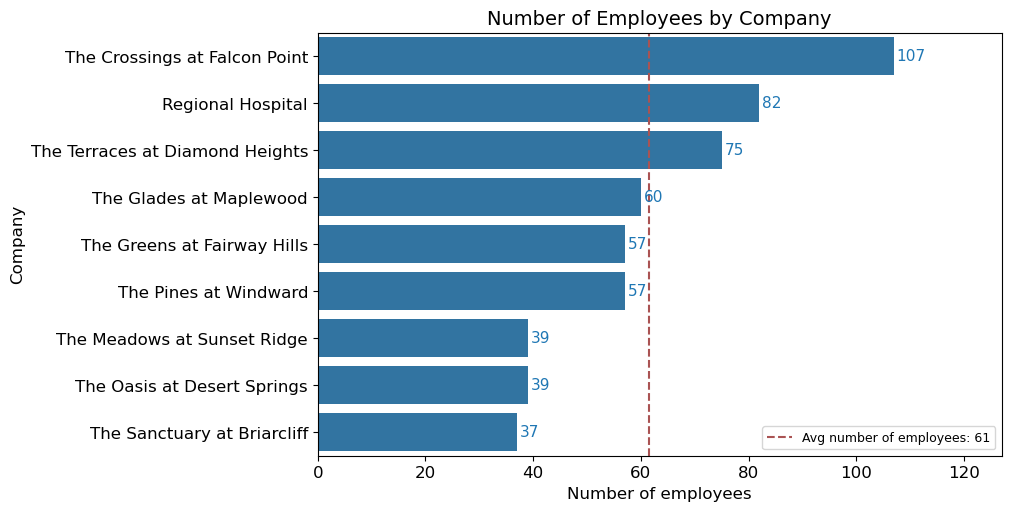

In [20]:
plt.figure(figsize=(10,5), layout='constrained')
light_red = sns.desaturate('tab:red',0.5)

sns.barplot(x=current_companies.sort_values(ascending=False), y=current_companies.sort_values(ascending=False).index, color='tab:blue')
plt.xlabel('Number of employees', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.xlim(0, max(current_companies.values) + 20)
plt.title('Number of Employees by Company', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add average number of employees as a vertical line
plt.axvline(x=avg_cur_company, color=light_red, linestyle='--', label='Avg number of employees: {:.0f}'.format(avg_cur_company))

# add labels to the bars with padding and adjust position
for i, v in enumerate(current_companies.sort_values(ascending=False)):
    plt.annotate(str("{:.0f}".format(v)), xy=(v, i), xytext=(2, 0), textcoords='offset points', color='tab:blue', fontsize=11, va='center')

plt.legend(fontsize=9)
plt.show()

* Without outliers
* Hospital second place
* top 3 above average

In [21]:
# Create a dataframe to show the sum of salaries by company
top_salaries_by_company = df_emp_2023[['company_name', 'salary']].groupby('company_name')['salary'].sum().sort_values(ascending=False)

# Create a dataframe to show the salaries above $ 50,000 and average.
current_salaries = top_salaries_by_company[top_salaries_by_company > 50000]
avg_cur_salaries = current_salaries.mean()

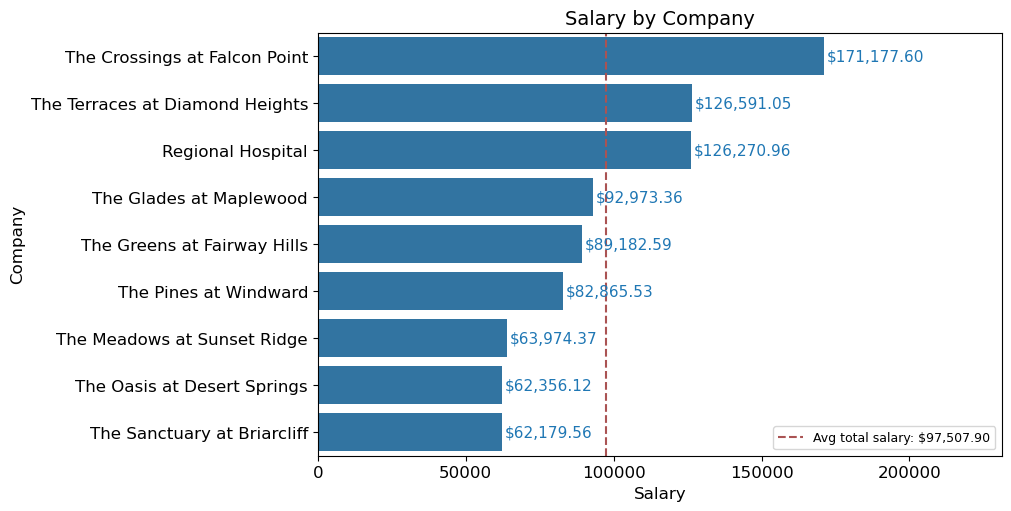

In [22]:
plt.figure(figsize=(10,5), layout='constrained')
light_red = sns.desaturate('tab:red',0.5)

sns.barplot(x=current_salaries.sort_values(ascending=False), y=current_salaries.sort_values(ascending=False).index, color='tab:blue')
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.xlim(0, max(current_salaries.values) + 60000)
plt.title('Salary by Company', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add average number of employees as a vertical line
plt.axvline(x=avg_cur_salaries, color=light_red, linestyle='--', label='Avg total salary: ${:,.2f}'.format(avg_cur_salaries))

# add labels to the bars with padding and adjust position
for i, v in enumerate(current_salaries.sort_values(ascending=False)):
    plt.annotate(str("${:,.2f}".format(v)), xy=(v, i), xytext=(2, 0), textcoords='offset points', color='tab:blue', fontsize=11, va='center')

plt.legend(fontsize=9)
plt.show()

* Hospital - 3rd place

In [23]:
# Create an age group column
df_emp['age_group'] = pd.cut(df_emp['age'], bins=[0, 25, 30 , 35, 100], labels=['18-25','25-30', '31-35', '36+'])
df_emp[['age', 'age_group']].head(10)

,age,age_group
0,21,18-25
1,25,18-25
2,24,18-25
3,34,31-35
4,18,18-25
5,30,25-30
6,34,31-35
7,21,18-25
8,31,31-35
9,22,18-25


In [24]:
# Average salary by age_group
average_salary_by_age_group = round(df_emp.groupby('age_group')['salary'].mean(),2)

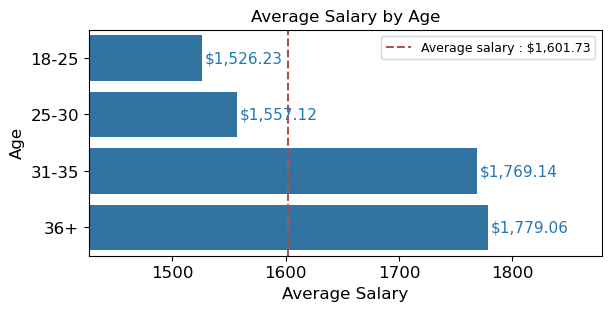

In [25]:
plt.figure(figsize=(6,3), layout='constrained')
light_red = sns.desaturate('tab:red',0.5)

sns.barplot(x=average_salary_by_age_group.sort_values(ascending=False), y=average_salary_by_age_group.sort_values(ascending=False).index, color='tab:blue')
plt.xlabel('Average Salary',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.xlim(min(average_salary_by_age_group.values) - 100, max(average_salary_by_age_group.values) + 100)
plt.title('Average Salary by Age')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add average number of employees as a vertical line
plt.axvline(x=avg_salary, color=light_red, linestyle='--', label='Average salary : ${:,.2f}'.format(avg_salary))

# add labels to the bars with padding and adjust position
for i, v in enumerate(average_salary_by_age_group.sort_values(ascending=True)):
    plt.annotate(str("${:,.2f}".format(v)), xy=(v, i), xytext=(2, 0), textcoords='offset points', color='tab:blue', fontsize=11, va='center')

plt.legend(loc='upper right',fontsize=9)
plt.show()

* Employees above 31 years old are payed above average

In [26]:
# Create monthly average
average_salary_by_month = round(df_emp.groupby('pay_month')['salary'].mean(),2)

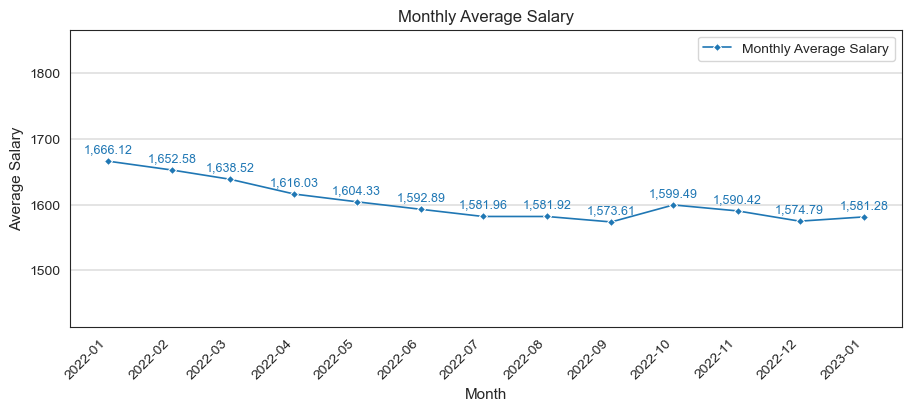

In [27]:
# Plot a monthly salary line chart
plt.figure(figsize=(9,4), layout='constrained')

sns.set_style('white')
sns.lineplot(x=average_salary_by_month.index, y=average_salary_by_month, marker='D', markersize=4, linewidth=1.2, label='Monthly Average Salary', color='tab:blue')

plt.xlabel('Month',fontsize=11)
plt.ylabel('Average Salary',fontsize=11)
plt.ylim(min(average_salary_by_month.values) - 160, max(average_salary_by_month.values) + 200)
plt.title('Monthly Average Salary')
plt.grid(color='gray', linestyle='-', linewidth=0.3, axis='y')

# Transform the date format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# add labels to the data points with padding and adjust position
for x, y in zip(average_salary_by_month.index, average_salary_by_month):
    plt.text(x, y + 13, str("{:,.2f}".format(y)), ha='center',fontsize=9, color='tab:blue')

plt.yticks(fontsize=10)
plt.xticks(average_salary_by_month.index, rotation=45, ha='right',fontsize=10)
plt.show()

* Salaries experienced a decrease since last year
* Maybe a further investigation is needed to see if employees are unsatisfied or are due to a high turnover

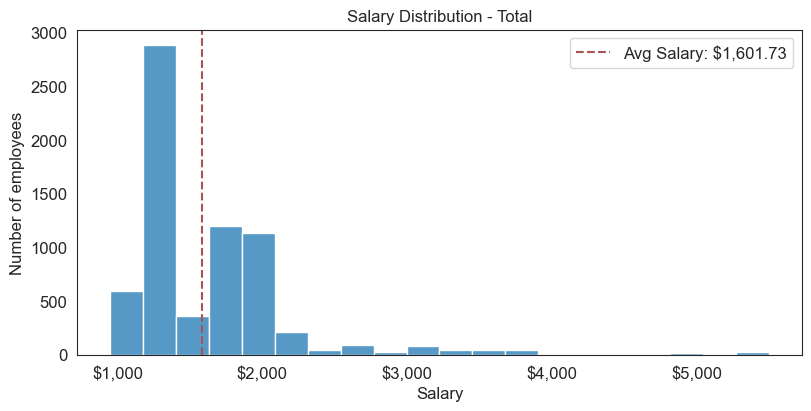

In [28]:
# Total salary distribution
plt.figure(figsize=(8,4), layout='constrained')
light_red = sns.desaturate('tab:red',0.5)
def money_format(x, pos):
    return "${:,.0f}".format(x)

sns.histplot(data=df_emp, x='salary', bins=20, color='tab:blue')

plt.axvline(x=last_month_avg_salary, color=light_red, linestyle='--', label='Avg Salary: ${:,.2f}'.format(avg_salary))

plt.title('Salary Distribution - Total')

plt.ylabel('Number of employees', fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Salary',fontsize=12)
plt.xticks(fontsize=12)
# Format x axis
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(money_format))

plt.legend(fontsize=12)
plt.show()

* There is a high number of people that receives a salary below average
* investigate qualification

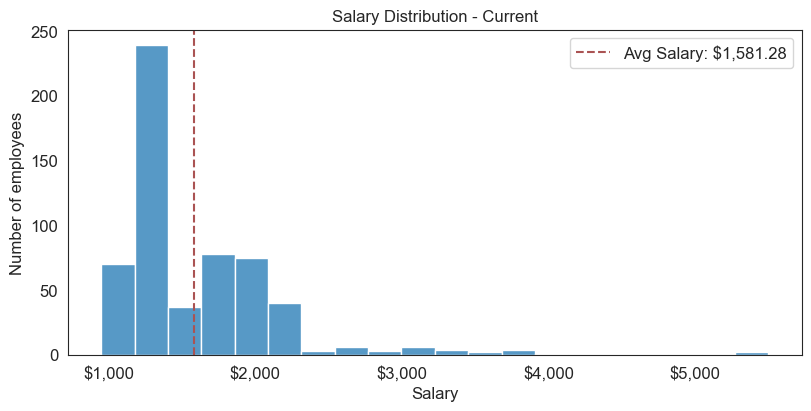

In [29]:
# Current salary distribution
plt.figure(figsize=(8,4), layout='constrained')
light_red = sns.desaturate('tab:red',0.5)
def money_format(x, pos):
    return "${:,.0f}".format(x)

sns.histplot(data=df_emp_today, x='salary', bins=20, color='tab:blue')

plt.axvline(x=last_month_avg_salary, color=light_red, linestyle='--', label='Avg Salary: ${:,.2f}'.format(last_month_avg_salary))

plt.title('Salary Distribution - Current')

plt.ylabel('Number of employees', fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Salary',fontsize=12)
plt.xticks(fontsize=12)
# Format x axis
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(money_format))

plt.legend(fontsize=12)
plt.show()

* There is no difference in distribution today in relation to last year
* There is a high number of people that receives a salary below average
* investigate qualification

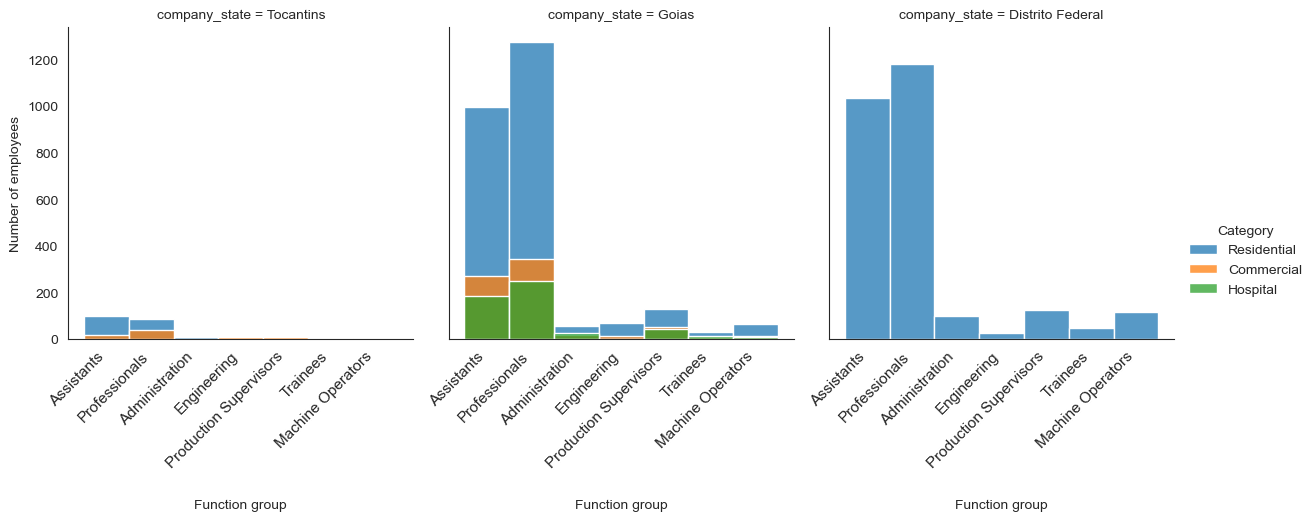

In [30]:
# Distribution of Salaries by Function Group in Each State
tableau_colors = sns.color_palette("tab10")
sns.set_palette(tableau_colors)

g = sns.FacetGrid(df_emp, col='company_state', hue="const_site_category", height=4, aspect=1)
g.map(sns.histplot, 'function_group')

g.set_ylabels(label='Number of employees')
g.set_xlabels(label='Function group', labelpad=20)
g.set_xticklabels(rotation=45, ha='right', fontsize=11)

g.add_legend(title='Category')

plt.show()

In [31]:
# Calculate the average salary
avg_salary = df_emp['salary'].mean()

# Calculate the average salary by age group
average_salary_by_age = round(df_emp.groupby('age')['salary'].mean(),2)

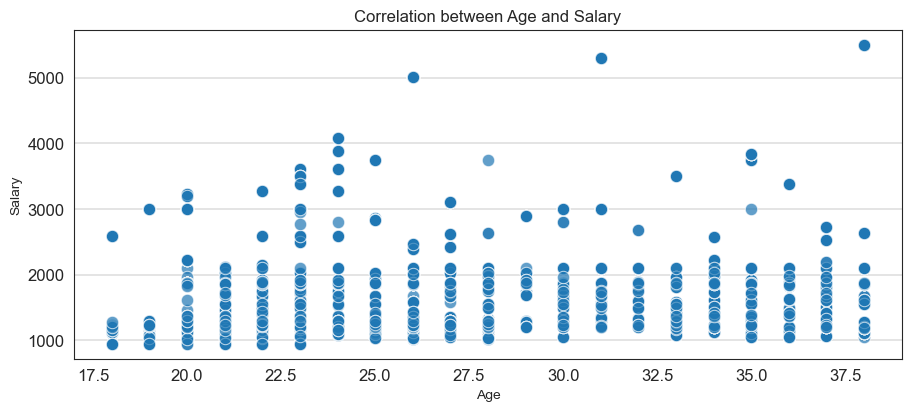

In [32]:
plt.figure(figsize=(9,4), layout='constrained')

sns.set_style("white")
sns.scatterplot(data=df_emp, x="age", y="salary", alpha=0.7, s=80)

plt.title("Correlation between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(color='gray', linestyle='-', linewidth=0.3, axis='y')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [33]:
# calculate the correlation coefficient
# The correlation coefficient is a statistical measure that ranges from -1 to 1. 
# Values closer to -1 or 1 indicating a stronger correlation and values closer to 0 indicating a weaker correlation.
# To check whether this correlation is statistically significant or if it could have occurred by chance we'll use the p-value.

corr, p_value = stats.pearsonr(df_emp['age'], df_emp['salary'])
print('Correlation Coefficient:', corr)
print('P-Value:', p_value)

Correlation Coefficient: 0.19337180847890453
P-Value: 2.4170883637310767e-58


The correlation coefficient of 0.193 indicates a weak positive linear relationship between *age* and *salary*. This means that as *age* increases the *salary* to increase as well, but the relationship is not very strong.

The p-value associated with this correlation coefficient is 2.417e-58, which is a very small value. This indicates that the observed correlation coefficient is statistically significant, and it is very unlikely to have occurred by chance.

We can conclude that there is a significant correlation between *age* and *salary* in this dataset.

In [34]:
# Average salary by gender
average_salary_by_gender_2022 = round(df_emp.groupby('gender')['salary'].mean(),2)
average_salary_by_gender_Today = round(df_emp_today.groupby('gender')['salary'].mean(),2)
print(average_salary_by_gender_2022)
print(average_salary_by_gender_Today)

gender
Female    1523.08
Male      1614.95
Name: salary, dtype: float64
gender
Female    1547.35
Male      1600.72
Name: salary, dtype: float64


* Female employees has lower average salaries however, this number today is decreasing

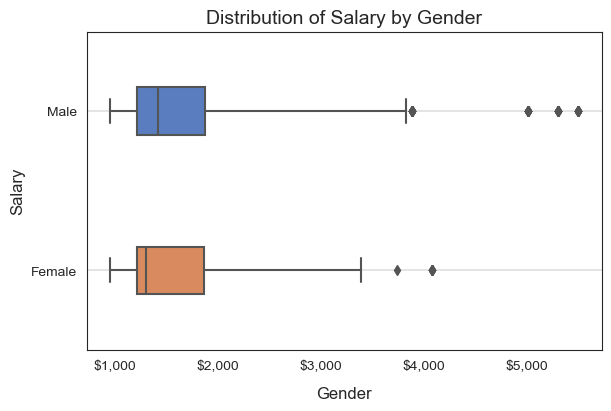

In [35]:
plt.figure(figsize=(6,4), layout='constrained')
sns.set_style("white")
def money_format(x, pos):
    return "${:,.0f}".format(x)

sns.boxplot(data=df_emp, y="gender", x="salary", orient='h', palette='muted', width=.3, whis=[0,99])
plt.grid(color='gray', linestyle='-', linewidth=0.3, axis='y')

plt.title("Distribution of Salary by Gender", fontsize=14)

plt.xlabel("Gender", fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(money_format))

plt.ylabel("Salary", fontsize=12)
plt.yticks(fontsize=10)

plt.show()

In [36]:
# Calculate a correlation between Gender and Salary.
# When we need to calculate correlation with categorical values we need to create a column to correlate to salary for this we'll use scipy.stats module in Python to calculate the Point-Biserial Correlation Coefficient. 

# Create a new column for gender as a binary variable
df_emp['gender_binary'] = df_emp['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Calculate the correlation coefficient and p-value
corr_gender_salary, p_value_gender_salary = stats.pointbiserialr(df_emp['gender_binary'], df_emp['salary'])

# Print the correlation coefficient and p-value
print('Correlation Coefficient:', corr_gender_salary)
print('P-Value:', p_value_gender_salary)

Correlation Coefficient: 0.05669261722206408
P-Value: 2.864500345574007e-06


the correlation coefficient between *gender* and *salary* is 0.056, which suggests a very weak positive relationship between these two variables. This means that there is a slight tendency for higher salaries to be associated with a particular gender, but the relationship is not strong.

The p-value of 2.864e-06 indicates that the correlation coefficient is statistically significant, and it is very unlikely to have occurred by chance. It means that the relationship between *gender* and *salary* is unlikely to be due to random chance.

This, however does not mean that correlation imply causation. Further analysis and interpretation of the data, including controlling for other relevant factors, would be needed to determine the cause of the relationship.

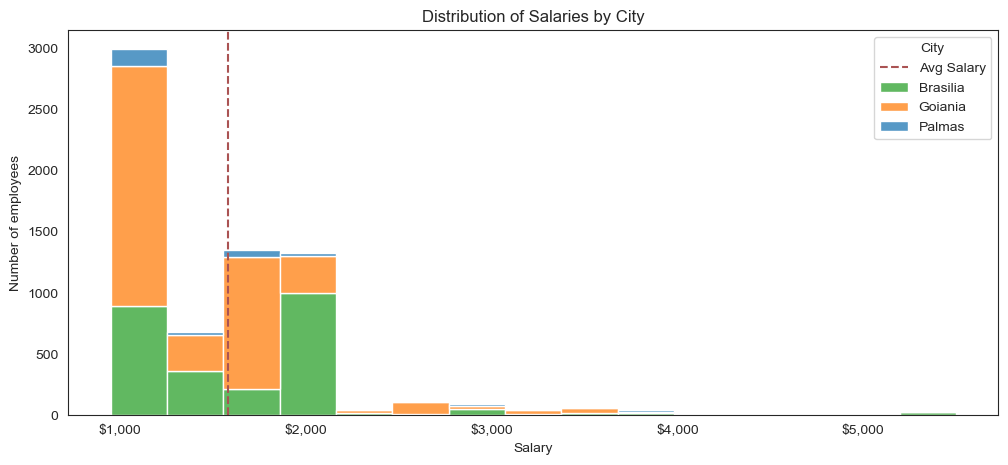

In [37]:
# Distribution of salaries by city
plt.figure(figsize=(12,5))
light_red = sns.desaturate('tab:red',0.5)
def money_format(x, pos):
    return "${:,.0f}".format(x)

ax = sns.histplot(df_emp, x="salary", hue="company_city", multiple='stack', bins=15, legend=True)
plt.title('Distribution of Salaries by City')
plt.xlabel('Salary')
plt.ylabel('Number of employees')

plt.axvline(x=last_month_avg_salary, color=light_red, linestyle='--', label='Avg Salary: ${:,.2f}'.format(avg_salary))

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(money_format))

ax.legend(('Avg Salary','Brasilia', 'Goiania', 'Palmas'), loc='upper right', title="City")

plt.show()

* Goiania has the most people working below average salaries

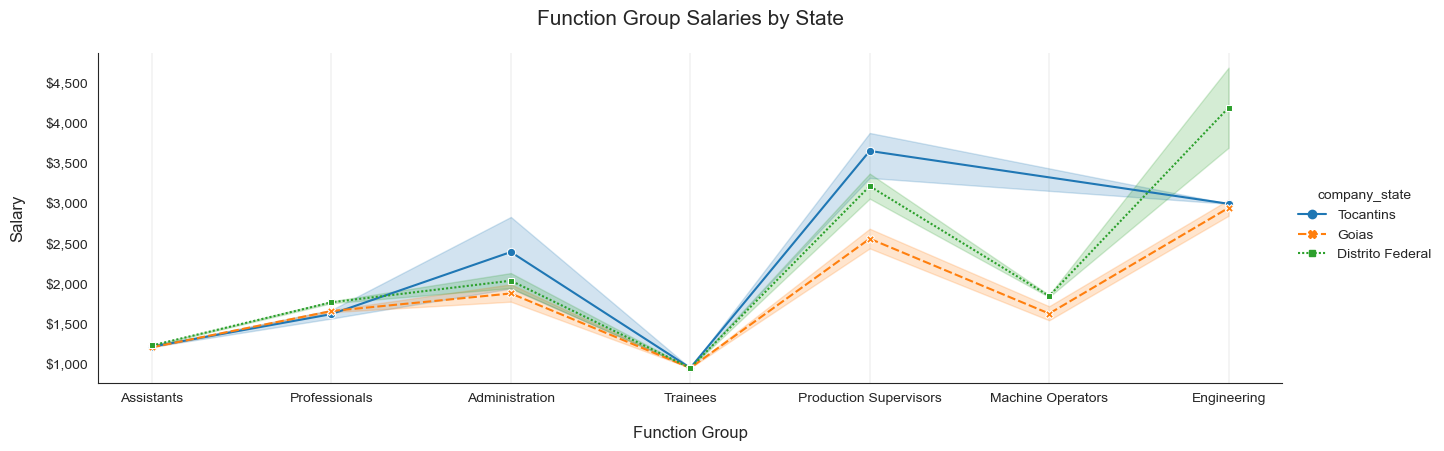

In [38]:
# Average of salaries by function group

def money_format(x, pos):
    return "${:,.0f}".format(x)

sns.relplot(data=df_emp, kind="line", x='function_group', y='salary', hue="company_state", style="company_state", markers=True, height=4, aspect=3.2)

plt.title('Function Group Salaries by State', fontsize=15, pad=20)
plt.xlabel('Function Group', fontsize=12, labelpad=15)
plt.ylabel('Salary', fontsize=12, labelpad=15)
plt.grid(linestyle='-', linewidth=0.3, axis='x')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(money_format))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


* Tocantins has a higher-paid administration.
* The salaries of production supervisors need further attention. It needs to be standardized.
* Distrito Federal has the highest paid engineering team.

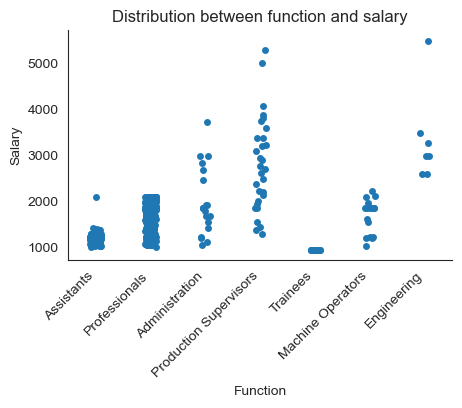

In [39]:
# Distribution between function and salary
sns.set_style('white')
sns.catplot(data=df_emp_today, x="function_group", y="salary", height=3, aspect=1.6)

plt.title('Distribution between function and salary')
plt.xlabel('Function')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')

plt.show()

* Lower-paid salaries has the most people
* Engineering and production supervisors has the highest salaries

In [40]:
# Now let's calculate a correlation between Function_Group and Salary.
# Again we need calculate the Point-Biserial Correlation Coefficient. 
# And create a p-value that is a measure of the evidence against the null hypothesis.

# Create a dictionary to map function groups to binary values
func_map = {'Assistants': 1, 'Professionals': 2, 'Administration': 3, 'Trainees': 4, 
            'Production Supervisors': 5, 'Machine Operators': 6, 'Engineering': 7}

# Map the function group column to binary values
df_emp['function_binary'] = df_emp['function_group'].map(func_map)

# Calculate the correlation coefficient and p-value
corr_func_salary, p_value_func_salary = stats.pointbiserialr(df_emp['function_binary'], df_emp['salary'])

# Print the correlation coefficient and p-value
print('Correlation Coefficient:', corr_func_salary)
print('P-Value:', p_value_func_salary)

Correlation Coefficient: 0.638592926789708
P-Value: 0.0


A correlation coefficient of 0.6386 indicates a moderately strong positive correlation between function group and salary. This means that there is a tendency for employees in higher function groups to have higher salaries.

The p-value of 0.0 indicates that there is strong evidence to support the idea that there is a correlation between function group and salary in the population.

In [41]:
# Average by function group
average_by_function_group = round(df_emp.groupby(["function_group"])["salary"].mean(),2)

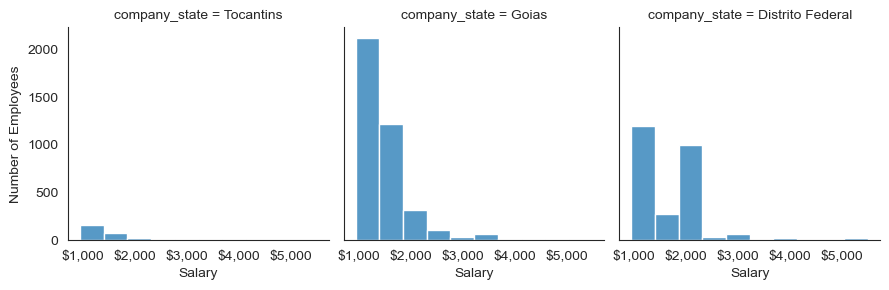

In [42]:
def money_format(x, pos):
    return "${:,.0f}".format(x)

g = sns.displot(df_emp, x="salary",col="company_state", height=3, aspect=1, bins=10)

g.set_ylabels('Number of Employees')
g.set_xlabels('Salary')

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(money_format))

plt.show()

* Goias is the state that has the most people in lowest salaries

In [43]:
# What is the average salary in construction sites?
average_salary = df_emp['salary'].mean()
print(f"The average salary of the construction sites is $ {average_salary:.2f}")

# What construction site has the highest average salary?
average_salary_by_const_site = df_emp.groupby('company_name')['salary'].mean()
max_average_const_site = average_salary_by_const_site.idxmax()
print(f"The construction site with the highest average is {max_average_const_site}")

# the average pay for the professionals function group
professionals_data = df_emp.loc[df_emp['function_group'] == 'Professionals']
print(f"The average pay for the professionals function group is $ {round(professionals_data['salary'].mean(), 2)}")

The average salary of the construction sites is $ 1601.73
The construction site with the highest average is The Villas at Hunter's Glen
The average pay for the professionals function group is $ 1699.61


In [44]:
# First we create a dataframe with only the information of last month.
last_month = df_emp['pay_month'].max()
last_month_data = df_emp.loc[df_emp['pay_month'] == last_month]

# Then we create our count function.
total_employees_by_construction_site = last_month_data['company_name'].value_counts()
print("Number of employees in every construction site of the last month:")
print(total_employees_by_construction_site)

Number of employees in every construction site of the last month:
The Crossings at Falcon Point      107
Regional Hospital                   82
The Terraces at Diamond Heights     75
The Glades at Maplewood             60
The Pines at Windward               57
The Greens at Fairway Hills         57
The Meadows at Sunset Ridge         39
The Oasis at Desert Springs         39
The Sanctuary at Briarcliff         37
The Landings at Ocean Breeze         4
The Villas at Hunter's Glen          3
The Grove at Parkside                3
The Arbors at Willow Creek           2
The Residences at Westlake           2
The Waters at Lake Austin            2
The Retreat at Oak Forest            1
The Summit at Laurel Canyon          1
Name: company_name, dtype: int64


In [45]:
(print ("Average pay of each construction site:"))
print(round(df_emp.groupby(['company_name'])['salary'].mean(), 2))

Average pay of each construction site:
company_name
Regional Hospital                  1547.88
The Arbors at Willow Creek         1535.50
The Crossings at Falcon Point      1626.85
The Enclave at Stonebridge         1251.22
The Glades at Maplewood            1557.90
The Greens at Fairway Hills        1606.70
The Grove at Parkside              1247.28
The Heights at Riverfront          1563.53
The Landings at Ocean Breeze       1365.62
The Meadows at Sunset Ridge        1713.96
The Oasis at Desert Springs        1576.51
The Parkview at Golden Gate        1608.37
The Pines at Windward              1519.47
The Residences at Westlake         1535.50
The Retreat at Oak Forest          1870.00
The Sanctuary at Briarcliff        1655.96
The Summit at Laurel Canyon        1640.43
The Terraces at Diamond Heights    1607.20
The Villas at Hunter's Glen        2015.65
The Waters at Lake Austin          1298.00
Name: salary, dtype: float64


In [46]:
(print('The average pay in the last month for every function:'))
print(round(last_month_data.groupby(['function_group'])['salary'].mean(),2))

The average pay in the last month for every function:
function_group
Administration            1998.29
Assistants                1223.16
Engineering               3351.46
Machine Operators         1700.76
Production Supervisors    2818.19
Professionals             1698.97
Trainees                   950.00
Name: salary, dtype: float64


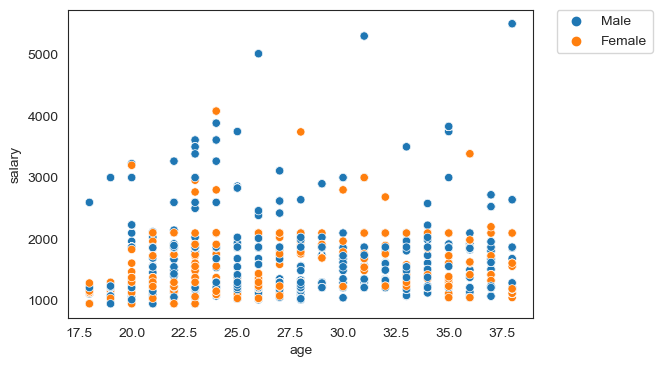

In [47]:
# Verificate the relationship between, salary, age and gender.

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df_emp, x='age', y='salary', hue='gender')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* The highest paid salaries are mostly men


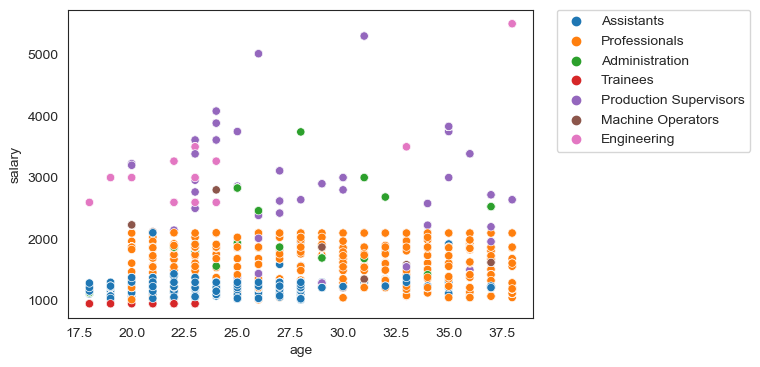

In [48]:
# Verificate the relationship between, salary, age and function group.
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df_emp, x='age', y='salary', hue='function_group')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* Trainees are the lowest-paid and the youngest
* Most of the assistants are below 28 years old
* Most of engineering teams are below 25 years old

In [49]:
# Add a percentage column in each needed dataset

df_emp['salary_percentage'] = df_emp['salary'] / df_emp['salary'].sum()
df_emp_today.loc[:,'salary_percentage'] = df_emp_today.loc[:,'salary'] / df_emp_today.loc[:,'salary'].sum()

df_emp.head()

C:\Users\daniel.marques\AppData\Local\Temp\ipykernel_5284\1449616208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_today.loc[:,'salary_percentage'] = df_emp_today.loc[:,'salary'] / df_emp_today.loc[:,'salary'].sum()


,id,month_year,employee_id,employee_name,gender,age,salary,function_group,company_name,company_city,company_state,company_type,const_site_category,pay_month,year,age_group,gender_binary,function_binary,salary_percentage
0,180152022-01-01,2022-01-01,18015,Brendan Foster,Male,21,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01,2022,18-25,1,1,0.000111
1,229832022-01-01,2022-01-01,22983,Jeremiah Sanders,Male,25,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01,2022,18-25,1,1,0.000111
2,180852022-01-01,2022-01-01,18085,Xavier Ross,Male,24,1212.0,Assistants,The Grove at Parkside,Palmas,Tocantins,Construction Site,Residential,2022-01-01,2022,18-25,1,1,0.000111
3,179422022-01-01,2022-01-01,17942,Jorge Russell,Male,34,1739.3,Professionals,The Summit at Laurel Canyon,Palmas,Tocantins,Construction Site,Commercial,2022-01-01,2022,31-35,1,2,0.000160
4,224222022-01-01,2022-01-01,22422,Edward Ortiz,Male,18,1212.0,Assistants,The Summit at Laurel Canyon,Palmas,Tocantins,Construction Site,Commercial,2022-01-01,2022,18-25,1,1,0.000111


In [50]:
# Percentage of salary by function and gender

per_by_gender_total = df_emp.groupby(['function_group','gender'])['salary_percentage'].sum() * 100
per_by_gender_total = per_by_gender_total.reset_index()

per_by_gender_today = df_emp_today.groupby(['function_group','gender'])['salary_percentage'].sum() * 100
per_by_gender_today = per_by_gender_today.reset_index()


### Plot a pay gap visualization to understand if the difference in the amount of salaries by gender in 2022 decreased in 2023.


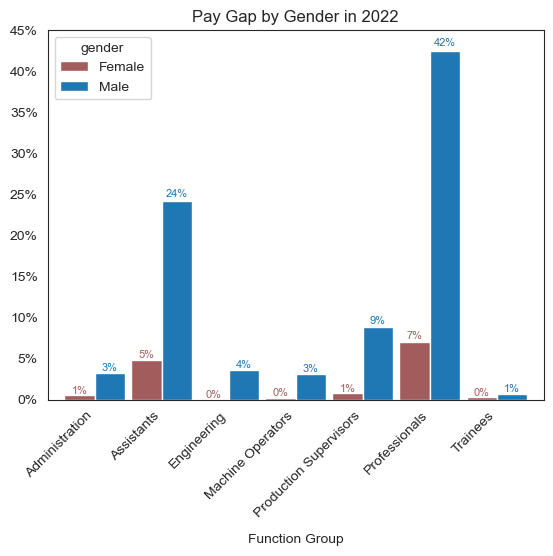

In [51]:
# Amount payed in 2022 by gender and function group

# Set color palette
light_red = sns.desaturate('tab:red',0.4)
colors = [ light_red, 'tab:blue']

# Set plot
per = per_by_gender_total.pivot(index='function_group', columns='gender', values='salary_percentage').plot.bar(width=0.9, color=colors)

# create a function to format the y-axis tick labels as percentages
def y_fmt(x, pos):
    return '{:.0%}'.format(x/100)

# apply the percentage formatting to the y-axis tick labels
fmt = mtick.FuncFormatter(y_fmt)
plt.gca().yaxis.set_major_formatter(fmt)

# General
plt.title('Pay Gap by Gender in 2022')

# Y axis
plt.ylim(0,45)

# X axis
plt.xticks(rotation=45, ha='right')
plt.xlabel('Function Group', labelpad=10)

# Add the percentage values as labels on top of the bars
for container in per.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*1.01, '{:.0%}'.format(height/100), ha='center', va='bottom', fontsize=8, color=bar.get_facecolor())

# Add an average line 
plt.axvline(x=last_month_avg_salary, color=light_red, linestyle='--', label='Average: ${:,.2f}'.format(avg_salary))

plt.show()

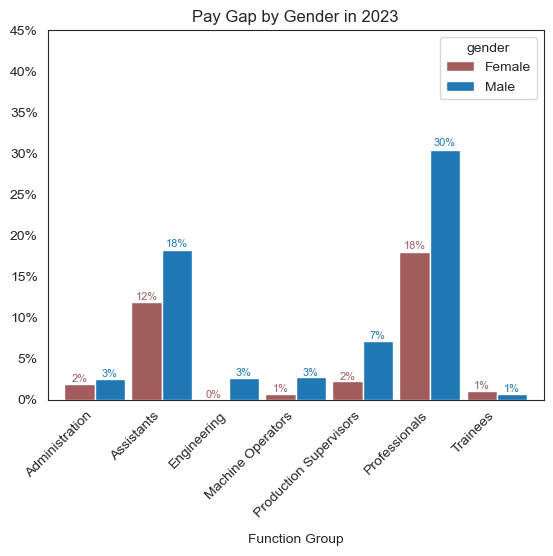

In [52]:
# Amount payed in 2023 by gender and function group

# Set color palette
light_red = sns.desaturate('tab:red',0.4)
colors = [ light_red, 'tab:blue']

# Set plot
per = per_by_gender_today.pivot(index='function_group', columns='gender', values='salary_percentage').plot.bar(width=0.9, color=colors)

# create a function to format the y-axis tick labels as percentages
def y_fmt(x, pos):
    return '{:.0%}'.format(x/100)

# apply the percentage formatting to the y-axis tick labels
fmt = mtick.FuncFormatter(y_fmt)
plt.gca().yaxis.set_major_formatter(fmt)

# General
plt.title('Pay Gap by Gender in 2023')

# Y axis
plt.ylim(0,45)

# X axis
plt.xticks(rotation=45, ha='right')
plt.xlabel('Function Group', labelpad=10)

# Add the percentage values as labels on top of the bars
for container in per.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*1.01, '{:.0%}'.format(height/100), ha='center', va='bottom', fontsize=8, color=bar.get_facecolor())

# Add an average line 
plt.axvline(x=last_month_avg_salary, color=light_red, linestyle='--', label='Average: ${:,.2f}'.format(avg_salary))

plt.show()

* The difference of average salary between genders has decreased

Crafting a Pareto Chart

Add column to display cumulative percentage and group by

In [53]:
# Sort DataFrame by count descending
pareto_by_function = round(df_emp.groupby('function_group')['salary'].sum().reset_index().sort_values('salary', ascending=False),2)

# Add column to display cumulative percentage
pareto_by_function['cumulative_percentage'] = round(pareto_by_function['salary'].cumsum() / pareto_by_function['salary'].sum()*100,2)

print(pareto_by_function)

           function_group      salary  cumulative_percentage
5           Professionals  5399667.63                  49.52
1              Assistants  3171787.01                  78.62
4  Production Supervisors  1050983.00                  88.26
0          Administration   414617.75                  92.06
2             Engineering   394684.80                  95.68
3       Machine Operators   362909.94                  99.01
6                Trainees   108300.00                 100.00


Now we plot the Pareto Chart

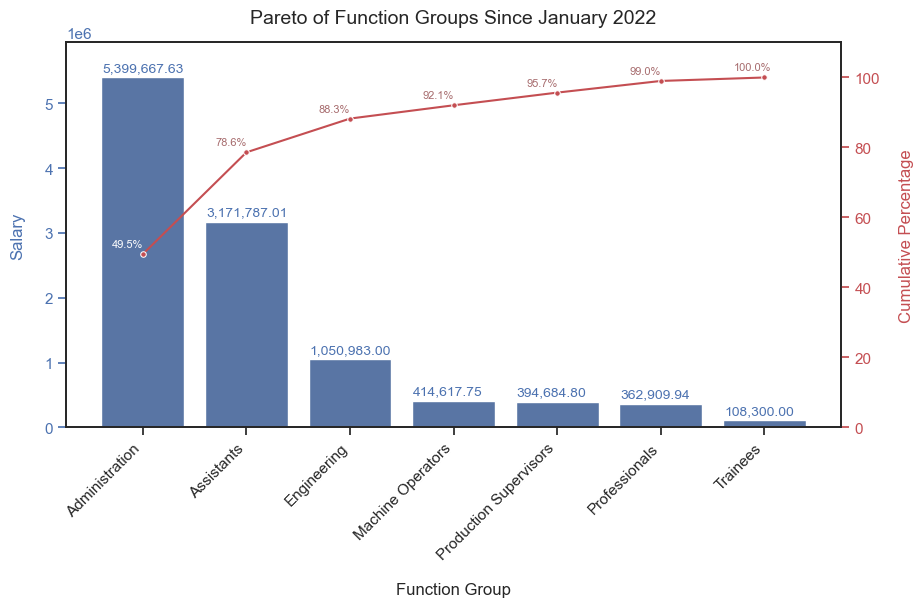

In [54]:
sns.set(style="ticks")
fig, ax1 = plt.subplots(figsize=(10, 5))
font_size = 12
light_red = sns.desaturate('r',0.5)

sns.barplot(x="function_group", y="salary", data=pareto_by_function, color="b", ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x="function_group", y="cumulative_percentage", data=pareto_by_function, color="r", marker='o', markersize=4, ax=ax2)

# Set properties of the y-axes
ax1.set_ylabel("Salary", fontsize=font_size, labelpad=14, color="b")
ax1.tick_params(axis='y', colors='b')

ax2.set_ylabel("Cumulative Percentage", fontsize=font_size, labelpad=14, color="r")
ax2.set_ylim(0, 110)
ax2.tick_params(axis='y', colors='r')

# Set properties of the x-axis
ax1.set_xlabel("Function Group", fontsize=font_size, labelpad=14)
ax1.set_ylim(0, pareto_by_function['salary'].max() * 1.1)
ax1.set_xticks(pareto_by_function.index)
ax1.set_xticklabels(pareto_by_function['function_group'], rotation=45, ha='right')

# Add labels to the bars
for i, bar in enumerate(pareto_by_function['salary']):
    ax1.annotate('{:,.2f}'.format(bar), xy=(i, bar), xytext=(i - 0.39, bar + 100000),
                 fontsize=10, color='b')

# Add labels to the line
for i, value in enumerate(pareto_by_function['cumulative_percentage']):
    color = light_red
    if i in (0,0):
        color = 'white'
    ax2.annotate('{:.1f}%'.format(value), xy=(i, value), xytext=(i - 0.3, value + 2),
                 fontsize=8, color=color)

plt.title("Pareto of Function Groups Since January 2022", fontsize=14, pad=14)
plt.show()


* Administration and Assistants represent 78.6% of the paid salaries since january 2022

In [55]:
rank = pareto_by_function['salary'].rank(ascending=False)
print(pareto_by_function)
pareto_by_function.loc[rank <= 2, 'salary'].sum() / pareto_by_function['salary'].sum() * 100

           function_group      salary  cumulative_percentage
5           Professionals  5399667.63                  49.52
1              Assistants  3171787.01                  78.62
4  Production Supervisors  1050983.00                  88.26
0          Administration   414617.75                  92.06
2             Engineering   394684.80                  95.68
3       Machine Operators   362909.94                  99.01
6                Trainees   108300.00                 100.00


78.6159208085821

In [56]:
# Sort DataFrame by count descending
pareto_by_company = round(df_emp.groupby('company_name')['salary'].sum().reset_index().sort_values('salary', ascending=False),2)

# Add column to display cumulative percentage
pareto_by_company['cumulative_percentage'] = round(pareto_by_company['salary'].cumsum() / pareto_by_company['salary'].sum()*100,2)

print(pareto_by_company)

                       company_name      salary  cumulative_percentage
2     The Crossings at Falcon Point  2939725.16                  26.96
12            The Pines at Windward  1633434.34                  41.94
11      The Parkview at Golden Gate  1521518.36                  55.90
9       The Meadows at Sunset Ridge  1035230.10                  65.39
17  The Terraces at Diamond Heights   867886.39                  73.35
0                 Regional Hospital   814185.30                  80.82
5       The Greens at Fairway Hills   639466.75                  86.69
4           The Glades at Maplewood   476717.55                  91.06
15      The Sanctuary at Briarcliff   331192.45                  94.10
10      The Oasis at Desert Springs   249088.99                  96.38
18      The Villas at Hunter's Glen   133033.10                  97.60
8      The Landings at Ocean Breeze    57356.08                  98.13
6             The Grove at Parkside    53633.16                  98.62
1     

In [57]:
rank = pareto_by_company['salary'].rank(ascending=False)
print(pareto_by_company)
pareto_by_company.loc[rank <= 6, 'salary'].sum() / pareto_by_company['salary'].sum() * 100

                       company_name      salary  cumulative_percentage
2     The Crossings at Falcon Point  2939725.16                  26.96
12            The Pines at Windward  1633434.34                  41.94
11      The Parkview at Golden Gate  1521518.36                  55.90
9       The Meadows at Sunset Ridge  1035230.10                  65.39
17  The Terraces at Diamond Heights   867886.39                  73.35
0                 Regional Hospital   814185.30                  80.82
5       The Greens at Fairway Hills   639466.75                  86.69
4           The Glades at Maplewood   476717.55                  91.06
15      The Sanctuary at Briarcliff   331192.45                  94.10
10      The Oasis at Desert Springs   249088.99                  96.38
18      The Villas at Hunter's Glen   133033.10                  97.60
8      The Landings at Ocean Breeze    57356.08                  98.13
6             The Grove at Parkside    53633.16                  98.62
1     

80.82197519874377

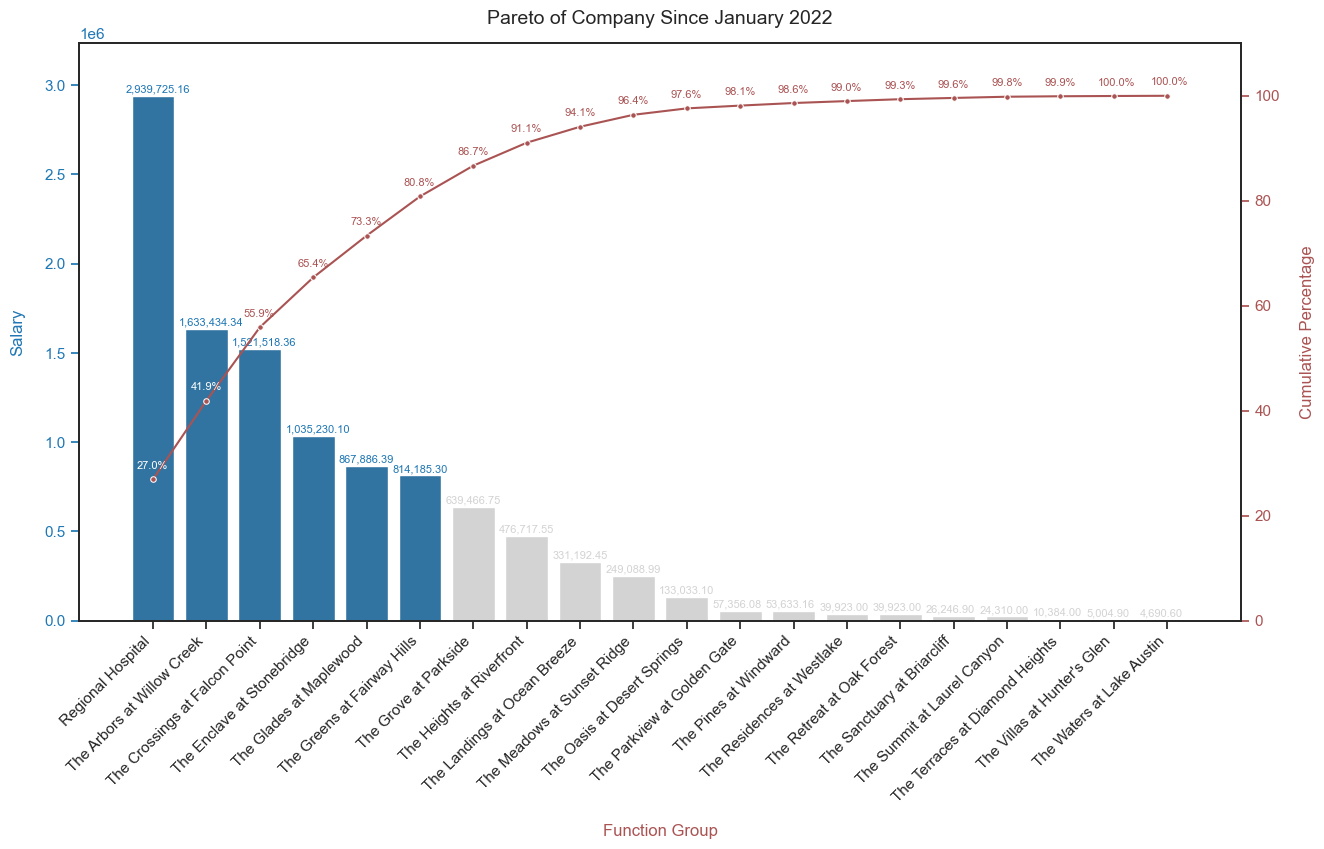

In [61]:
# Get the rank of each company by salary
rank = pareto_by_company['salary'].rank(ascending=False)
# Define the colors for the bars
colors = np.where(rank <= 6, 'tab:blue', 'lightgrey')
light_red = sns.desaturate('tab:red',0.5)

sns.set(style="ticks")
fig, ax1 = plt.subplots(figsize=(15, 7.5))
font_size = 12

sns.barplot(x="company_name", y="salary", data=pareto_by_company, palette=colors, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x="company_name", y="cumulative_percentage", data=pareto_by_company, color=light_red, marker='o', markersize=4, ax=ax2)

# Set properties of the y-axes
ax1.set_ylabel("Salary", fontsize=font_size, labelpad=14, color='tab:blue')
ax1.tick_params(axis='y', colors='tab:blue')

ax2.set_ylabel("Cumulative Percentage", fontsize=font_size, labelpad=14, color=light_red)
ax2.set_ylim(0, 110)
ax2.tick_params(axis='y', colors=light_red)


# Set properties of the x-axis
ax1.set_xlabel("Function Group", fontsize=font_size, labelpad=14, color=light_red)
ax1.set_ylim(0, pareto_by_company['salary'].max() * 1.1)
ax1.set_xticks(pareto_by_company.index)
ax1.set_xticklabels(pareto_by_company['company_name'], rotation=45, ha='right')

# Add labels to the bars
for i, bar in enumerate(pareto_by_company['salary']):
    color = colors[i]
    ax1.annotate('{:,.2f}'.format(bar), xy=(i, bar), xytext=(i - 0.52, bar + 20000),
                 fontsize=8, color=color)

# Add labels to the line
for i, value in enumerate(pareto_by_company['cumulative_percentage']):
    color = light_red
    if i in (0, 1):
        color = 'white'
    ax2.annotate('{:.1f}%'.format(value), xy=(i, value), xytext=(i - 0.3, value + 2),
                 fontsize=8, color=color)

plt.title("Pareto of Company Since January 2022", fontsize=14, pad=14)
plt.show()

* 3 companies represent 55.9% of the paid salaries since january 2022. The top 6 represents 80.8%.
* The Regional Hospital alone represents 27.0%.